In [1]:
import numpy as np
import math
import matplotlib.pyplot as plt
from matplotlib import colors
%matplotlib inline

from itertools import chain

In [2]:
# ---- Define the image ---- #

L = 1000 # Size of the image
h = 250
I = np.ones((L+1,L+1))
for i in range(h, L+1-h):
    for j in range(h, L+1-h):
        I[i,j] = -1
        
        
# ---- Adding noise to the image ---- #

n_prob = .3 # Probability of a pixel to change color
sample = np.random.choice([True, False], I.shape, p=[n_prob, 1-n_prob])

n_I = I.copy()
for i, j in np.ndindex(sample.shape):
    if sample[i,j]:
        n_I[i,j] = -n_I[i,j]

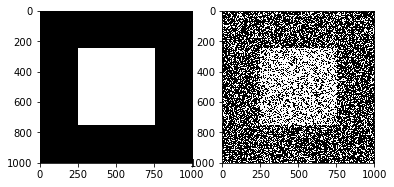

In [3]:
# ---- Making a nice plot ---- #

cmap = colors.ListedColormap(['white', 'black'])
fig, (ax1, ax2) = plt.subplots(1, 2)
ax1.imshow(I, interpolation='nearest', cmap=cmap)
ax2.imshow(n_I, interpolation='nearest', cmap=cmap)
plt.show()

In [4]:
# ---- First attempt by averaging local value with respect to direct neighbours ---- #

def avr(M):
    M_res = np.pad(M, pad_width=1, mode='constant', constant_values=0)
    for i in range(1,M.shape[0]):
        for j in range(1,M.shape[1]):
            M[i, j] = M_res[i-1,j] + M_res[i+1, j] + M_res[i, j-1] + M_res[i, j+1]
    return M

In [5]:
N = 10
for epoch in range(N):
    n_I = avr(n_I) 

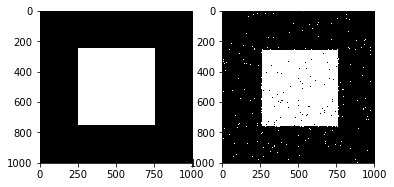

In [6]:
# ---- Making a nice plot ---- #

fig, (ax1, ax2) = plt.subplots(1, 2)
ax1.imshow(I, interpolation='nearest', cmap=cmap)
ax2.imshow(n_I, interpolation='nearest', cmap=cmap)
plt.show()

In [7]:
# Let us generate a slightly more complicated image
L = 1000
h = 200
I = np.ones((L+1,L+1))
indx = list(range(h, 2*h)) + list(range(3*h, 4*h))

for i in indx:
    for j in indx:
        I[i, j] = -I[i, j]

        
# ---- Adding noise once again ---- #

n_prob = .3 # Probability of a pixel to change color
sample = np.random.choice([True, False], I.shape, p=[n_prob, 1-n_prob])

n_I = I.copy()
for i, j in np.ndindex(sample.shape):
    if sample[i,j]:
        n_I[i,j] = -n_I[i,j]

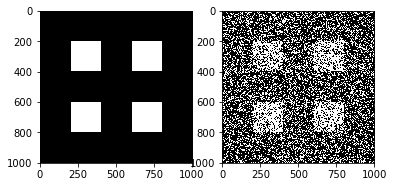

In [8]:
# ---- Making a nice plot ---- #

fig, (ax1, ax2) = plt.subplots(1, 2)
ax1.imshow(I, interpolation='nearest', cmap=cmap)
ax2.imshow(n_I, interpolation='nearest', cmap=cmap)
plt.show()

In [9]:
N = 10
for epoch in range(N):
    n_I = avr(n_I)

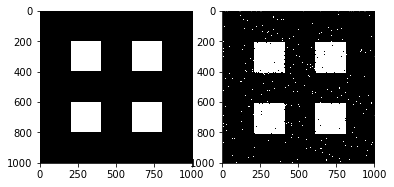

In [10]:
# ---- Making a nice plot ---- #

fig, (ax1, ax2) = plt.subplots(1, 2)
ax1.imshow(I, interpolation='nearest', cmap=cmap)
ax2.imshow(n_I, interpolation='nearest', cmap=cmap)
plt.show()

In [11]:
import cv2

In [12]:
img = cv2.imread('test.png',2)

In [13]:
ret, bw_img = cv2.threshold(img,127,255,cv2.THRESH_BINARY)

In [14]:
for i, j in np.ndindex(bw_img.shape):
    if bw_img[i, j] == 0:
        bw_img[i, j] = 1
    else:
        bw_img[i, j] = -1

In [15]:
n_prob = .1 # Probability of a pixel to change color
sample = np.random.choice([True, False], bw_img.shape, p=[n_prob, 1-n_prob])

n_img = bw_img.copy()
for i, j in np.ndindex(sample.shape):
    if sample[i,j]:
        n_img[i,j] = -n_img[i,j]

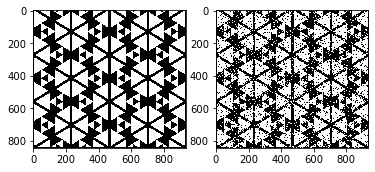

In [16]:
# ---- Making a nice plot ---- #

fig, (ax1, ax2) = plt.subplots(1, 2)
ax1.imshow(bw_img, interpolation='nearest', cmap=cmap)
ax2.imshow(n_img, interpolation='nearest', cmap=cmap)
plt.show()

In [17]:
N = 10
for epoch in range(N):
    n_I = avr(n_I)

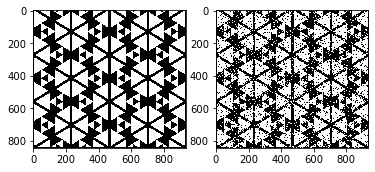

In [18]:
# ---- Making a nice plot ---- #

fig, (ax1, ax2) = plt.subplots(1, 2)
ax1.imshow(bw_img, interpolation='nearest', cmap=cmap)
ax2.imshow(n_img, interpolation='nearest', cmap=cmap)
plt.show()

In [ ]:
# ---- Simulated annealing ---- #

